In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.
/opt/anaconda3/envs/nmep/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/nmep/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/nmep/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/nmep/lib/python3.6/site-packag

In [2]:
overviews=pd.read_csv("MoviesWithOverviews.csv")

In [3]:
print(overviews.shape)

(45466, 33)


In [4]:
#reference-https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

In [5]:
#filter = overviews["overview"] != ""
#overviews = overviews[filter]
#overviews = overviews.dropna()

In [6]:
overviews['overview'].isnull().sum()

954

In [7]:
overviews.dropna(subset = ["overview"], inplace=True)
print(overviews.shape)
print(overviews)


(44512, 33)
                                                overview  Action  Adventure  \
0      Led by Woody, Andy's toys live happily in his ...       0          0   
1      When siblings Judy and Peter discover an encha...       0          1   
2      A family wedding reignites the ancient feud be...       0          0   
3      Cheated on, mistreated and stepped on, the wom...       0          0   
4      Just when George Banks has recovered from his ...       0          0   
...                                                  ...     ...        ...   
45461        Rising and falling between a man and woman.       0          0   
45462  An artist struggles to finish his work while a...       0          0   
45463  When one of her hits goes wrong, a professiona...       1          0   
45464  In a small town live two brothers, one a minis...       0          0   
45465  50 years after decriminalisation of homosexual...       0          0   

       Animation  Aniplex  BROSTA TV  C

In [8]:
overviews.fillna(0, inplace=True)


In [9]:
# Text cleaning
#reference: https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text): 
    #removing everything except letters and converting to lower case
    text = re.sub("[^a-zA-Z]"," ",str(text))
    text = ' '.join(text.split())
    text = text.lower() 
    return text

# Removing stopwords such as the, and, to, or etc
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [10]:
plot_summaries=[]
for text in overviews['overview']:
    cleanText=clean_text(text)
    textWithoutStopwords=remove_stopwords(cleanText)
    plot_summaries+=[textWithoutStopwords]
overviews.insert(1,"clean_overview", plot_summaries, True)
print("Features: ", overviews.columns)

Features:  Index(['overview', 'clean_overview', 'Action', 'Adventure', 'Animation',
       'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands',
       'History', 'Horror', 'Mardock Scramble Production Committee', 'Music',
       'Mystery', 'Odyssey Media', 'Pulser Productions', 'Rogue State',
       'Romance', 'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western'],
      dtype='object')


In [11]:
genreLabels=overviews[[ 'Action', 'Adventure', 'Animation',
       'Aniplex', 'BROSTA TV', 'Carousel Productions', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'GoHands',
       'History', 'Horror', 'Mardock Scramble Production Committee', 'Music',
       'Mystery', 'Odyssey Media', 'Pulser Productions', 'Rogue State',
       'Romance', 'Science Fiction', 'Sentai Filmworks', 'TV Movie',
       'Telescene Film Group Productions', 'The Cartel', 'Thriller',
       'Vision View Entertainment', 'War', 'Western']]
genreLabels.head()

,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,Comedy,Crime,Documentary,Drama,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

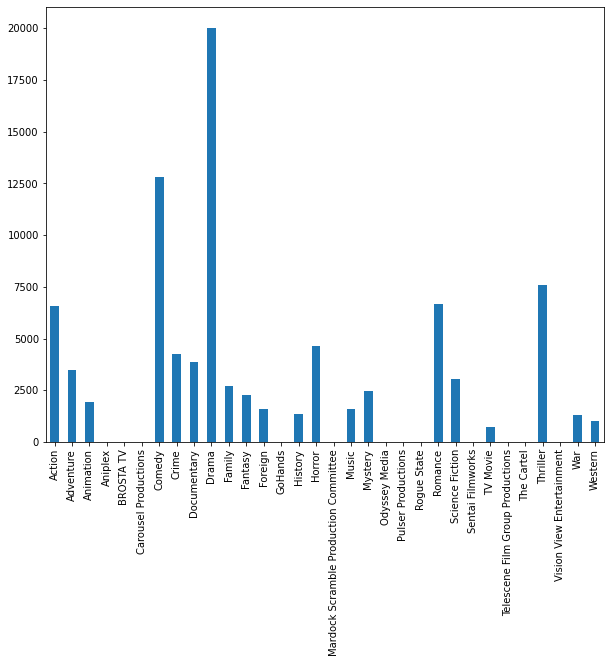

In [12]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
genreLabels.sum(axis=0).plot.bar()

In [13]:
X = []
sentences = list(overviews["clean_overview"])
for sen in sentences:
    X.append(sen)

y = genreLabels.values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
#number of unique words
vocab_length = len(tokenizer.word_index) + 1

In [16]:
#converting sentences to arrays
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshikajalan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
#Finding the number of words in the longest overveiw and applying padding
from nltk.tokenize import word_tokenize

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(overviews["clean_overview"], key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
print(length_long_sentence )

X_train = pad_sequences(X_train, length_long_sentence, padding='post')
X_test = pad_sequences(X_test, length_long_sentence, padding='post')


177


In [19]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/Users/harshikajalan/Downloads/glove.6B/glove.6B.100d.txt', encoding="utf8")#change path

In [20]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [21]:
#creating embedding matrix
embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [22]:
deep_inputs = Input(shape=(length_long_sentence,))
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(32, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [23]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 177)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 177, 100)          6595900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
Total params: 6,717,276
Trainable params: 121,376
Non-trainable params: 6,595,900
_________________________________________________________________
None


In [25]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 28487 samples, validate on 7122 samples
Epoch 1/10
28487/28487 [==============================] - 71s 2ms/step - loss: 0.1781 - acc: 0.9362 - val_loss: 0.1753 - val_acc: 0.9376
Epoch 2/10
28487/28487 [==============================] - 65s 2ms/step - loss: 0.1778 - acc: 0.9364 - val_loss: 0.1751 - val_acc: 0.9377
Epoch 3/10
28487/28487 [==============================] - 64s 2ms/step - loss: 0.1777 - acc: 0.9363 - val_loss: 0.1749 - val_acc: 0.9377
Epoch 4/10
28487/28487 [==============================] - 71s 2ms/step - loss: 0.1777 - acc: 0.9364 - val_loss: 0.1751 - val_acc: 0.9377
Epoch 5/10
28487/28487 [==============================] - 66s 2ms/step - loss: 0.1776 - acc: 0.9365 - val_loss: 0.1753 - val_acc: 0.9377
Epoch 6/10
28487/28487 [==============================] - 67s 2ms/step - loss: 0.1776 - acc: 0.9365 - val_loss: 0.1749 - val_acc: 0.9377
Epoch 7/10
28487/28487 [==============================] - 67s 2ms/step - loss: 0.1777 - acc: 0.9365 - val_loss: 0.1754 - val_acc:

In [26]:
model.save('PlotToGenremodel.h5')

In [28]:
predictions = model.predict(X_test)

In [30]:
predictions.shape

(8903, 32)

In [35]:
df = pd.DataFrame(predictions)

In [36]:
df.to_csv("Predictions.csv")

In [33]:
predictions[0]

array([1.27881378e-01, 5.52280545e-02, 2.86222696e-02, 5.65946102e-05,
       4.69982624e-05, 1.23083591e-05, 2.55629212e-01, 9.88617837e-02,
       9.75233614e-02, 4.86568958e-01, 5.08864522e-02, 4.59853411e-02,
       3.84068489e-02, 5.56111336e-05, 2.85925567e-02, 1.13294184e-01,
       3.85642052e-05, 3.60446274e-02, 6.30315840e-02, 4.06205654e-05,
       3.29613686e-05, 3.46302986e-05, 1.35925800e-01, 5.65180182e-02,
       5.29289246e-05, 1.70330405e-02, 2.24113464e-05, 3.46899033e-05,
       1.38558537e-01, 2.59578228e-05, 3.22972238e-02, 2.52657235e-02],
      dtype=float32)

In [ ]:
predictions.to